$$Exploratory-Data-Analysis$$

---

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import lux
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

plt.rcParams['figure.figsize'] = 13,6
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('E://Desktop//crp_time _delay_data.csv')

In [6]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:

sns.set(style = 'whitegrid', color_codes = True)

In [15]:
data.isnull().sum()

Retailer           0
Salerank           0
X2013USSales       0
X2013WorldSales    0
ProfitMargin       0
NumStores          0
Industry           0
Reward             0
ProgramName        0
RewardType         4
RewardStructure    0
RewardSize         0
ExpirationMonth    0
IndustryType       0
dtype: int64


In [16]:
data.dropna(inplace = True)

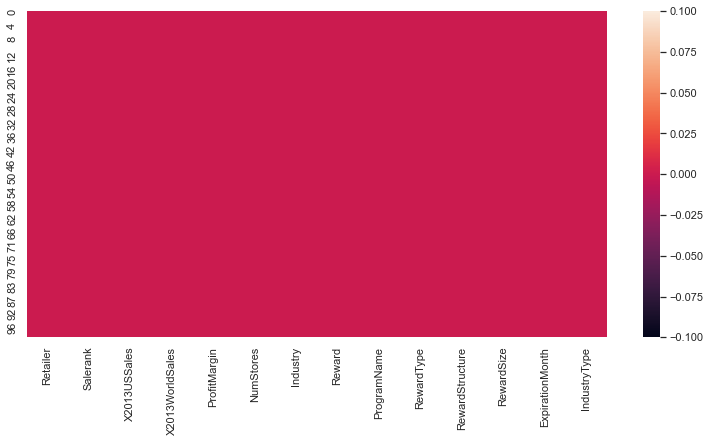

In [19]:
sns.heatmap(data.isnull())
plt.show()

In [22]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Retailer         96 non-null     object 
 1   Salerank         96 non-null     int64  
 2   X2013USSales     96 non-null     float64
 3   X2013WorldSales  96 non-null     float64
 4   ProfitMargin     96 non-null     float64
 5   NumStores        96 non-null     float64
 6   Industry         96 non-null     object 
 7   Reward           96 non-null     int64  
 8   ProgramName      96 non-null     object 
 9   RewardType       96 non-null     object 
 10  RewardStructure  96 non-null     object 
 11  RewardSize       96 non-null     object 
 12  ExpirationMonth  96 non-null     object 
 13  IndustryType     96 non-null     object 
dtypes: float64(4), int64(2), object(8)
memory usage: 11.2+ KB


In [20]:
data.head()

,Retailer,Salerank,X2013USSales,X2013WorldSales,ProfitMargin,NumStores,Industry,Reward,ProgramName,RewardType,RewardStructure,RewardSize,ExpirationMonth,IndustryType
0,A&P,74,5.831,5.831,48.85,0.277,"Discount, Variety Stores",0,No rewards program,-,-,-,-,Discount
1,Albertsons,21,19.452,19.452,69.02,1.024,Grocery Stores,0,No rewards program,-,-,-,-,Grocery
2,Aldi,38,10.898,10.650,69.41,1.328,Grocery Stores,0,No rewards program,-,-,-,-,Grocery
3,Alimentation Couche Tard (Circle K),82,4.755,8.551,68.03,3.826,Grocery Stores,0,No rewards program,-,-,-,-,Grocery
4,Apple Stores,15,26.648,30.736,11.07,0.254,ElectronicEquipment,0,No rewards program,-,-,-,-,Specialty


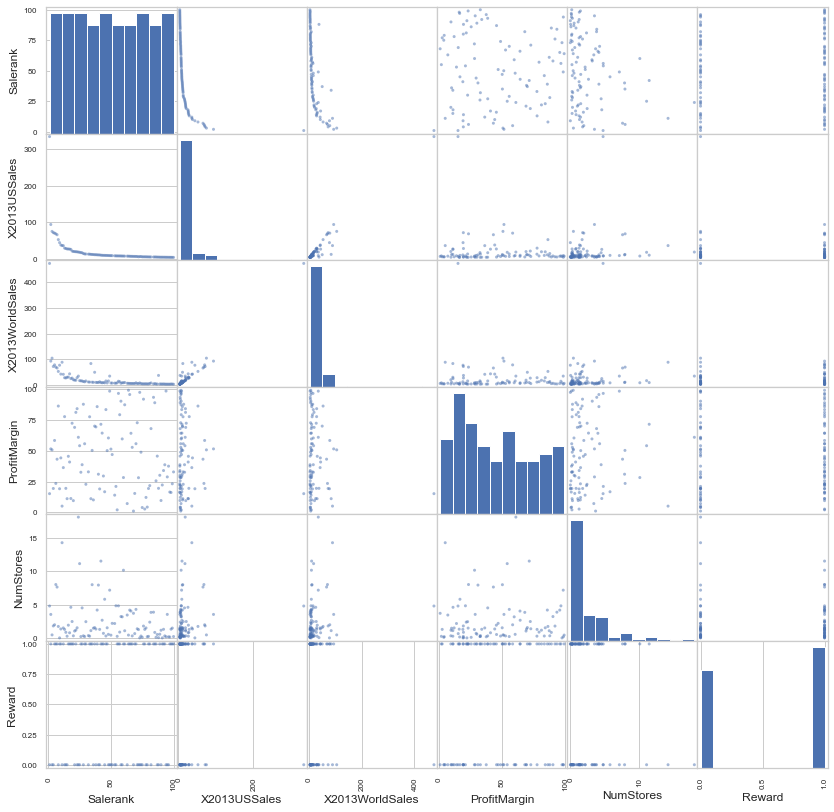

In [21]:
pd.plotting.scatter_matrix(data[['Salerank','X2013USSales','X2013WorldSales','ProfitMargin','NumStores','Reward',
                                'RewardSize',]],  diagonal='hist', figsize=(14,14))

plt.show()

In [23]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

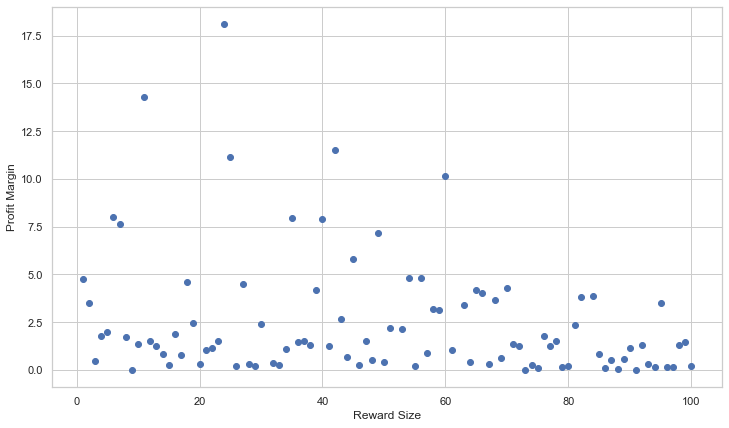

In [25]:
plt.figure(figsize=(12,7))
plt.scatter(x=data['Salerank'], y=data['NumStores'])
plt.xlabel("Reward Size")
plt.ylabel("Profit Margin")
plt.show()

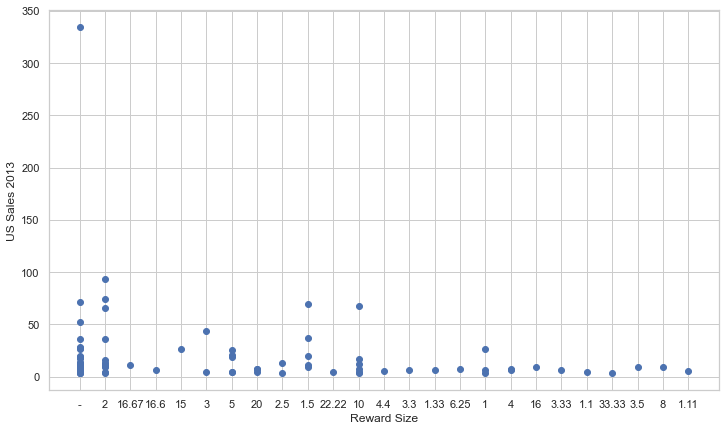

In [32]:
plt.figure(figsize=(12,7))
plt.scatter(y=data['X2013USSales'], x=data['RewardSize'])
plt.ylabel("US Sales 2013")
plt.xlabel("Reward Size")
plt.show()

In [33]:
flight_delays = pd.read_csv('E://Desktop//delay-UA-messy.csv')

In [35]:
flight_delays

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [37]:
flight_delays.isnull().sum()

DAY_OF_MONTH           0
DAY_OF_WEEK            0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
CRS_ARR_TIME           0
ARR_DELAY              0
ARR_DEL15              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
DISTANCE               0
dtype: int64


In [38]:
flight_delays.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DAY_OF_MONTH         3897 non-null   int64 
 1   DAY_OF_WEEK          3897 non-null   int64 
 2   ORIGIN               3897 non-null   object
 3   DEST                 3897 non-null   object
 4   CRS_DEP_TIME         3897 non-null   int64 
 5   CRS_ARR_TIME         3897 non-null   int64 
 6   ARR_DELAY            3897 non-null   int64 
 7   ARR_DEL15            3897 non-null   int64 
 8   CRS_ELAPSED_TIME     3897 non-null   int64 
 9   ACTUAL_ELAPSED_TIME  3897 non-null   int64 
 10  DISTANCE             3897 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 335.0+ KB


In [39]:
flight_delays.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [41]:
flight_delays.duplicated().unique()

array([False])

In [42]:
flight_delays.ORIGIN.unique()

array(['SFO', 'DEN', 'ORD', 'IAH'], dtype=object)

In [43]:
flight_delays.ARR_DEL15.unique()

array([0, 1], dtype=int64)

In [45]:
flight_delays.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,31,4,SFO,DEN,1418,1758,-31,0,160,137,967
1,31,4,DEN,IAH,1601,1926,9,0,145,134,862
2,31,4,ORD,DEN,1600,1748,36,1,168,155,888
3,31,4,ORD,SFO,1241,1531,7,0,290,291,1846
4,31,4,IAH,SFO,1852,2114,-6,0,262,250,1635


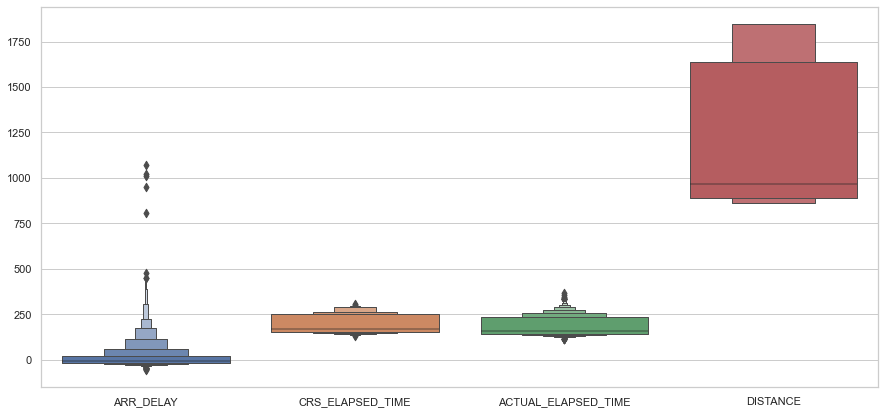

In [46]:
plt.figure(figsize=(15,7))
sns.boxenplot(data=flight_delays[['ARR_DELAY','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','DISTANCE']])
plt.show()

In [47]:
flight_delays.groupby(['ORIGIN','DEST']).sum()['DISTANCE']

ORIGIN  DEST
DEN     IAH     299114
        ORD     262848
        SFO     289133
IAH     DEN     303424
        ORD     283050
        SFO     470880
ORD     DEN     277944
        IAH     293225
        SFO     755014
SFO     DEN     272694
        IAH     469245
        ORD     740246
Name: DISTANCE, dtype: int64


In [48]:
flight_delays.DAY_OF_MONTH.unique()

array([31, 30, 29, 28, 27, 26, 25, 23, 24, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 12, 13, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [49]:
clean_flight_data = pd.read_csv('E://Desktop//delay-UA-cleaned.csv')

In [50]:
clean_flight_data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [52]:
clean_flight_data.isnull().sum()

DAY_OF_MONTH           0
DAY_OF_WEEK            0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
CRS_ARR_TIME           0
ARR_DELAY              0
ARR_DEL15              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
DISTANCE               0
dtype: int64


In [53]:
clean_flight_data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DAY_OF_MONTH         3900 non-null   int64 
 1   DAY_OF_WEEK          3900 non-null   int64 
 2   ORIGIN               3900 non-null   object
 3   DEST                 3900 non-null   object
 4   CRS_DEP_TIME         3900 non-null   int64 
 5   CRS_ARR_TIME         3900 non-null   int64 
 6   ARR_DELAY            3900 non-null   int64 
 7   ARR_DEL15            3900 non-null   int64 
 8   CRS_ELAPSED_TIME     3900 non-null   int64 
 9   ACTUAL_ELAPSED_TIME  3900 non-null   int64 
 10  DISTANCE             3900 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 335.3+ KB


In [54]:
clean_flight_data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [55]:
clean_flight_data.ORIGIN.unique()

array(['SFO', 'DEN', 'ORD', 'IAH', 'CVG'], dtype=object)

In [56]:
clean_flight_data.groupby("DAY_OF_WEEK").mean()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [57]:
delay_by_day = clean_flight_data[["DAY_OF_WEEK", "ARR_DELAY"]]

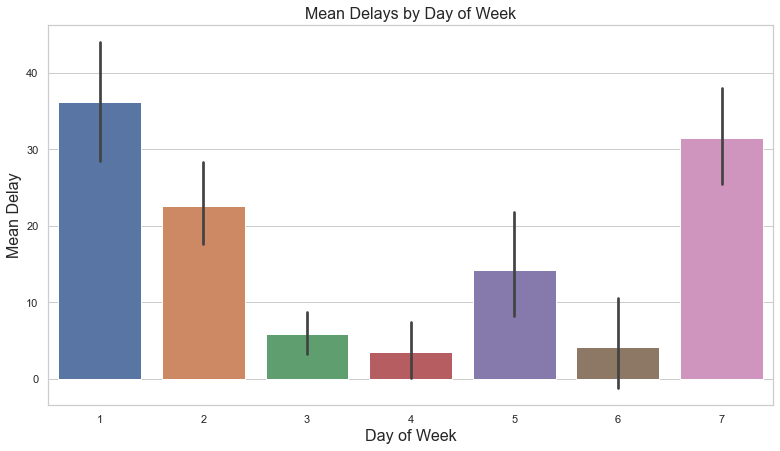

In [62]:
plt.figure(figsize=(13, 7))
sns.barplot(x = "DAY_OF_WEEK", y = "ARR_DELAY", data = delay_by_day)
plt.title("Mean Delays by Day of Week", fontsize = 16)
plt.ylabel("Mean Delay", fontsize = 16)
plt.xlabel("Day of Week", fontsize = 16)
plt.show()

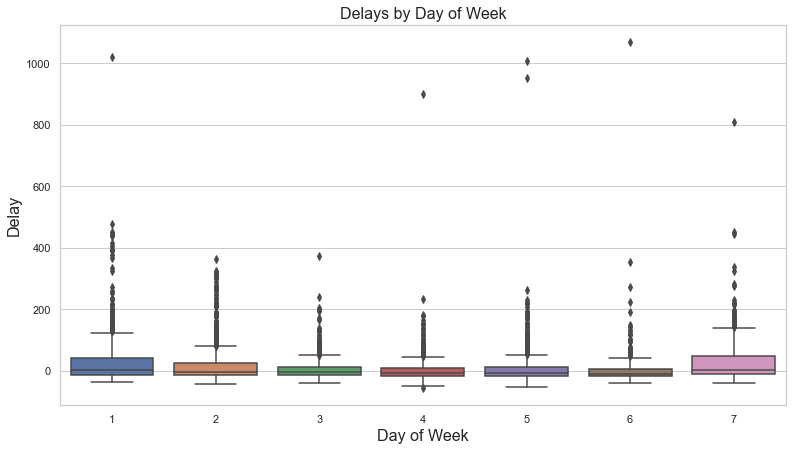

In [64]:
plt.figure(figsize=(13, 7))
sns.boxplot(x = "DAY_OF_WEEK", y = "ARR_DELAY", data = delay_by_day)
plt.title("Delays by Day of Week", fontsize = 16)
plt.ylabel("Delay", fontsize = 16)
plt.xlabel("Day of Week", fontsize = 16)
plt.show()

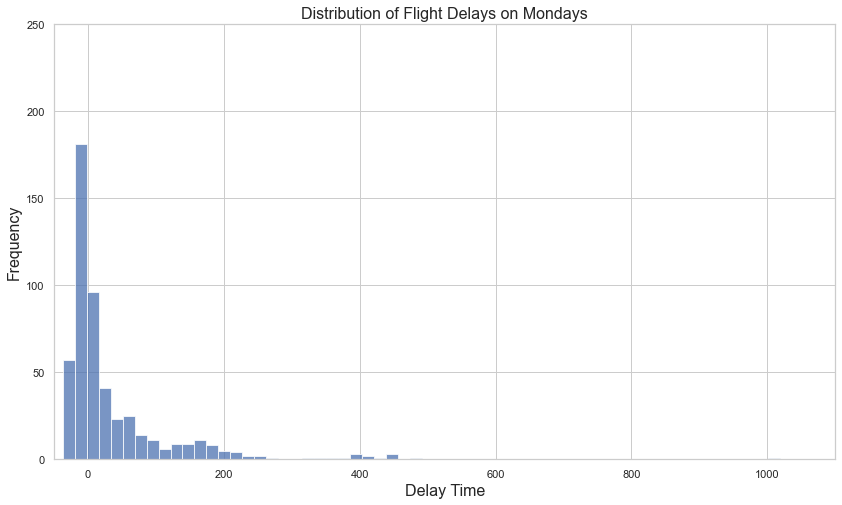

In [66]:
plt.figure(figsize=(14, 8))
d = delay_by_day[delay_by_day["DAY_OF_WEEK"] == 1]
d["ARR_DELAY"].hist(bins = 60, alpha = 0.75)
plt.xlim(-50, 1100)
plt.ylim(0, 250)
plt.title("Distribution of Flight Delays on Mondays", fontsize = 16)
plt.xlabel("Delay Time", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()


---

# Thankyou!


---

@Majeed Shaikh